<a href="https://colab.research.google.com/github/akitim/SkillFactory_current/blob/main/Unit_7_Basic_ML_algorithms_part_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Юнит 7. Основные алгоритмы машинного обучения. Часть II


## ML-5. Решающие деревья и случайный лес


### 5.2. Решающие деревья

#### Задание 5.2.3
Обучите на предложенных данных решающее дерево. Целевой переменной здесь является переменная `Class`. Размер тестовой выборки возьмите за ` 0.2, random_state = 17` для разбиения и дерева. Максимальную глубину дерева примите за **3**, максимальное число признаков, по которым ищется лучшее разбиение в дереве — за **2**. Какое значение $\ F1-score $ вы получили? Округлите до трёх знаков после точки-разделителя.

In [9]:
import pandas as pd
import numpy as np

path = 'https://raw.githubusercontent.com/akitim/datasets/main/bill_authentication.csv'
df = pd.read_csv(path)
df.sample(5)

,Variance,Skewness,Curtosis,Entropy,Class
106,2.3136,10.66510,-3.52880,-4.76720,0
238,3.9994,0.90427,1.16930,1.68920,0
1112,-4.1429,2.77490,0.68261,-0.71984,1
866,-4.1409,3.46190,-0.47841,-3.88790,1
1178,-2.0754,1.27670,-0.64206,-1.26420,1


In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

RND_SEED = 17

target = 'Class'
X = df.drop(target, axis=1).values
Y = df[target].values

X_train, X_test, Y_train, Y_test =\
    train_test_split(X, Y, test_size= 0.2, random_state=RND_SEED)

clf_tree = DecisionTreeClassifier(criterion='gini',
                                  max_depth=3,
                                  max_features=2,
                                  random_state=RND_SEED)

clf_tree.fit(X_train, Y_train)

from sklearn.metrics import f1_score

Y_pred = clf_tree.predict(X_test)
print ('f1_score = ', round(f1_score (Y_test, Y_pred), 3))

f1_score =  0.866


#### Задание 5.2.4

Проклассифицируйте банкноту с вектором признаков `2.04378, -0.38422, 1.437292, 0.76421`. К какому классу она относится?

In [11]:
banknote_sample = np.array([2.04378, -0.38422, 1.437292, 0.76421]).reshape(1, -1)
print ('Предсказанный класс банкноты [2.04378, -0.38422, 1.437292, 0.76421]:',
       clf_tree.predict(banknote_sample)[0])

Предсказанный класс банкноты [2.04378, -0.38422, 1.437292, 0.76421]: 0


#### ПРИМЕР
===================================================

===================================================

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

RANDOM_SEED = 139

def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01),
                       np.arange(y_min, y_max, 0.01))

train_data, train_labels = make_blobs(n_samples=100, centers=[(-3,-3),(4,2)], 
                                      n_features=2, random_state=RANDOM_SEED,
                                      cluster_std=(5,5))


clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=None, 
                                  random_state=RANDOM_SEED)

# training the tree
clf_tree.fit(train_data, train_labels)

# some code to depict separating surface
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), 
                                   yy.ravel()]).reshape(xx.shape)

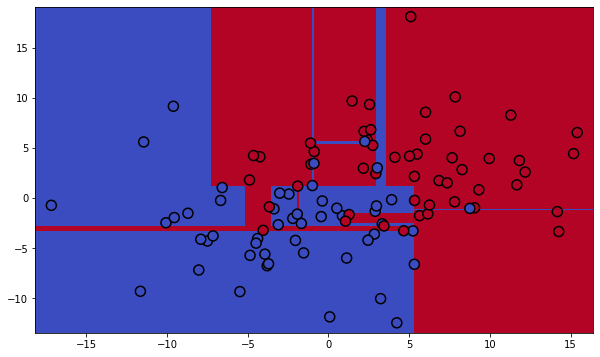

In [22]:
plt.figure(figsize = (10, 6))
plt.pcolormesh(xx, yy, predicted, cmap='coolwarm')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
            cmap='coolwarm', edgecolors='black', linewidth=1.5);

===================================================

===================================================

#### Задание 5.2.5

Обучите решающее дерево для регрессии на предложенных данных, размер тестовой выборки возьмите за `0.3, random_state = 42` для разбиения и дерева. Вычислите ***RMSE***, округлите до двух знаков после точки-разделителя.

In [21]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

path = 'https://lms.skillfactory.ru/assets/courseware/v1/fc8c2fb45f3b0b86d8fe409ff0f430af/asset-v1:Skillfactory+DST-PRO+15APR2020+type@asset+block/petrol_consumption.csv'
df = pd.read_csv(path)

df.sample(5)

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
17,7.0,3718,4725,0.540,714
45,9.0,4476,3942,0.571,510
4,8.0,4399,431,0.544,410
27,7.5,3846,9061,0.579,631
30,7.0,3640,6905,0.518,571


In [22]:
RND_SEED = 42

target = 'Petrol_Consumption'
X = df.drop(target, axis=1).values
Y = df[target].values

X_train, X_test, Y_train, Y_test =\
    train_test_split(X, Y, test_size= 0.3, random_state=RND_SEED)

tree_regr = DecisionTreeRegressor(random_state=RND_SEED)

tree_regr.fit(X_train, Y_train)
Y_pred = tree_regr.predict(X_test)

RMSE = np.sqrt(1 / Y_test.shape[0] * (Y_pred - Y_test) @ (Y_pred - Y_test))
TD = tree_regr.get_depth()

print('RMSE = ', round(RMSE, 2),
      '\nTree depth = ', TD)

RMSE =  87.97 
Tree depth =  11


#### Задание 5.4.1

На рисунке представлено решающее дерево «Ситуации из жизни» с признаками «количество доступных денег» и «количество времени до важного события».
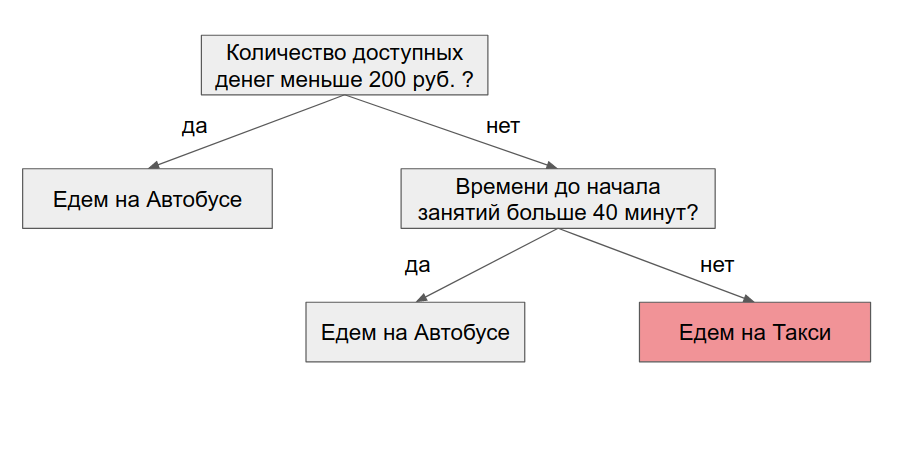
усть дана следующая выборка из пяти объектов (первый признак — деньги, второй — время):

[250, 45]

[100, 35]

[400, 30]

[250, 60]

[300, 50]

Сколько из них попадёт в красный лист?

In [42]:
class DecisionTree():
    def __init__(self, time, money):
        # self.root = 
        pass
    def create_split(self, node):
        pass

v = np.array([
              [250, 45],
              [100, 35],
              [400, 30],
              [250, 60],
              [300, 50]              
])
v = v[v[:, 0]>200]
v[v[:, 1]<40].shape[0]

1

#### Задание 5.4.2
3. Пусть решается задача классификации с помощью решающего дерева. Ниже приведены разные варианты распределения классов в какой-то произвольной вершине ([c1, c2, c3] означает, что в вершине c1 объектов первого класса, c2 объектов второго класса и c3 объектов третьего класса).

Какой из них должен получить меньшее значение критерия информативности?


[35, 45, 20]
[95, 3, 2]
[33, 34, 33]

In [16]:
import numpy as np

def entropy_information_criterion(vector):

    vector = np.array(vector)
    prob = vector / np.sum(vector)

    return - prob @ np.log2(prob)

def gini_information_criterion(vector):

    vector = np.array(vector)
    p = vector / np.sum(vector)

    return p @ (1 - p)
entry = np.array([
                  [35, 45, 20],
                  [95, 3, 2],
                  [33, 34, 33]
])

n_min = np.argmin([entropy_information_criterion(row) for row in entry])
print ('Minimum entropy is for', entry[n_min])

n_min = np.argmin([gini_information_criterion(row) for row in entry])
print ('Minimum gini criterion is for', entry[n_min])

Minimum entropy is for [95  3  2]
Minimum gini criterion is for [95  3  2]


In [8]:
z = [1, 2, 3]
z = np.array(z)
z = np.array(z)
z


array([1, 2, 3])